[<img src="../../header.svg">](../index.ipynb)

---

# Multigrid method


Obwohl die Konvergenzrate des Zweigitterverfahrens $h$-unabhängig ist, limitiert letztlich die Größe des  Grobgitterproblems immer noch die Komplexität. Ersetzt man dies durch eine rekursive Approximation, ergibt sich das **Mehrgitterverfahren**:



<ins>Algorithmus:</ins> `MGV`($A_l, x_l, b_l$)
* Falls $l=0$:
>
> `Löse` $A_0 x_0 = b_0$;
>
> `return` $x_0$;

* Vorglättung:
>for i=1:$\nu_1$ do
>
>    $\hspace{3em}x_l := x_l + M_l^{-1}(b_l-A_l x_l)$ 
>
> end 

* **NEU:** _Approximative_ Grobgitterkorrektur (rekursiv!) 
> $d_{l-1} := r (b_l-A_l x_l); $ 
>
> $e_{l-1} := 0;$ 
>
> for i=1:$\gamma$ do
>
> $\hspace{3em}$ e_l:=`MGV`($A_{l-1}, e_{l-1}, d_{l-1}$)
>
> end
>
> $x_l := x_l + p e_{l-1}$ 

* Nachglättung (optional, aus Symmetriegründen):
>for i=1:$\nu_2$ do
>
>    $\hspace{3em}x_l := x_l + M_l^{-1}(b_l-A_h x_l)$ 
>
> end 

* Rückgabe:
> `return` $x_l$;


## Configuration

Loading Domain './grids/laplace_sample_grid_2d-tri.ugx'...
Domain loaded.
Refining ...
Refining step {0} ...
Refining step {1} ...
Refining step {2} ...
Refining step {3} ...
Refining step {4} ...
Refining done
Approximation space:
| ---------------------------------------------------------------------------- |
|  Number of DoFs (All Procs)                                                  |
|  Algebra: Block 1 (divide by 1 for #Index)                                   |
|                                                                              |
|    GridLevel   |       Domain |     0: Inner |  1: Boundary                  |
| ---------------------------------------------------------------------------- |
| (lev,    0)    |            9 |            1 |            8 |
| (lev,    1)    |           25 |            9 |           16 |
| (lev,    2)    |           81 |           49 |           32 |
| (lev,    3)    |          289 |          225 |           64 |
| (lev,    4)    |        

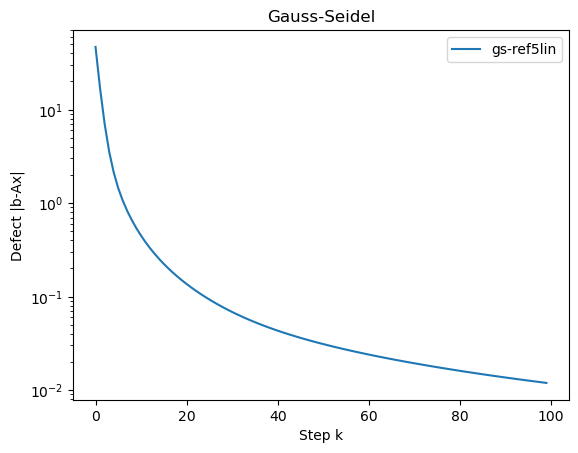

Widget(value='<iframe src="http://localhost:58169/index.html?ui=P_0x2954cea20_4&reconnect=auto" class="pyvista…

In [23]:
%run example01-smoothers.ipynb

In [24]:
myBaseLevel = 1

mg = ugcore.GeometricMultiGrid2dCPU1(approxSpace)  # Konstruktor
mg.set_discretization(domainDisc)
mg.set_base_level(0)          # Multi-grid

# Configuration of the smoother.
mg.set_smoother(preconditioners["jac"])                  
mg.set_num_presmooth(1)   # Vorglaettung
mg.set_num_postsmooth(1)  #  Nachglaettung
mg.set_rap(True)          # fuer Galerkinprodukt A_H=RAP, if true (alternative: assemble coarse system)

# Konfiguration Grobgitterloeser
baseSolver = ugcore.LUCPU1()
mg.set_base_level(myBaseLevel)          # Multi-grid
mg.set_base_solver(baseSolver)     

mg.set_cycle_type(1)       # Select cycle type "V,W,F".


In [25]:
# dbgWriter = GridFunctionDebugWriter(approxSpace)
# mgv:set_debug(dbgWriter) -- REQ?
linSolver.set_preconditioner(mg)

Auch hiermit können wir jetzt testen:

In [26]:
historyMGV = {}

for nu in range(1,6):
    mg.set_num_presmooth(nu)
    historyMGV[nu] = SolverTest(domainDisc, approxSpace, linSolver, "ErrorMGV")
    print()
    print("1/nu=" + str(1.0/nu))
    print()
    print("=========")



   % %%%%%%%%      Iterative Linear Solver  Results: 15 steps (rho=0.3826643328557718)
Time: 0.004125 seconds
ErrorMGV

1/nu=1.0

Results: 10 steps (rho=0.2499961612679429)
Time: 0.002489 seconds
ErrorMGV

1/nu=0.5

Results: 9 steps (rho=0.18682063372505664)
Time: 0.002521 seconds
    %%%%%%%%%%%
   % %%%%%%%%   (Precond: Geometric MultiGrid)  %%%%%%%%%%%
   %   Iter      Defect         Rate 
   %    0:    1.595483e+02      -------
   %    1:    1.559684e+01    9.775627e-02
   %    2:    4.665989e+00    2.991624e-01
   %    3:    1.804790e+00    3.867969e-01
   %    4:    7.421501e-01    4.112113e-01
   %    5:    3.129286e-01    4.216513e-01
   %    6:    1.339066e-01    4.279144e-01
   %    7:    5.789355e-02    4.323426e-01
   %    8:    2.523022e-02    4.358037e-01
   %    9:    1.106869e-02    4.387075e-01
   %   10:    4.884337e-03    4.412752e-01
   %   11:    2.166873e-03    4.436371e-01
   %   12:    9.661554e-04    4.458753e-01
   %   13:    4.328789e-04    4.480427e-01
   %